In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [2]:
data = pd.read_csv("/kaggle/input/laptop-price/laptop_price.csv", encoding= 'unicode_escape')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


The dataset used for this notebook is the "Laptop Price" dataset on Kaggle, 
which can be found at the following link 
https://www.kaggle.com/muhammetvarl/laptop-pricehttps://www.kaggle.com/muhammetvarl/laptop-price.

At the above link, there is also a description of the variables, which will be repeated below.

1 Company- String -Laptop Manufacturer

2 Product -String -Brand and Model

3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)

4 Inches -Numeric- Screen Size

5 ScreenResolution -String- Screen Resolution

6 Cpu- String -Central Processing Unit (CPU)

7 Ram -String- Laptop RAM

8 Memory -String- Hard Disk / SSD Memory

9 GPU -String- Graphics Processing Units (GPU)

10 OpSys -String- Operating System

11 Weight -String- Laptop Weight

12 Price_euros -Numeric- Price (Euro)

## **Goal**:  Predict the price of a laptop from the other variables.

Note that this is a regression problem, where the target variable is Price_euros.

# Hypothesis Generation

Here we will try to generate some hypotheses about what could affect the price of a laptop.

1. Laptops made by well-known companies like Apple and Microsoft might be more expensive.

2. Laptops with a bigger screen size might be more expensive.

3. Laptops with a high screen resolution might be more expensive.

4. Laptops with a high CPU might be more expensive.

5. Laptops with a higher RAM might be more expensive.

6. Laptops with a large memory might be more expensive.

7. Laptops with a high GPU might be more expensive.

8. Laptops without an operating sysytem might be cheaper.

9. Lighter Laptops might be more expensive than heavier laptops
   because they could be newer with more advanced technology.

In [3]:
# Here we will import the required packages.

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Quick Analysis

In [4]:
data.shape

(1303, 13)

In [5]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [6]:
# First, we will check if there are any duplicate laptop Id's.

idsUnique = len(set(data['laptop_ID']))
idsTotal = data.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [7]:
# Since there are no duplicates, we will drop the laptop_ID column.

data.drop(['laptop_ID'], axis=1, inplace=True)

In [8]:
data.shape

(1303, 12)

In [9]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Step 2: Split the data into training and test sets.

In [10]:
# We will put 80% of the data in the training set and the remaining 20% in the test set.

train, test = train_test_split(data, train_size=0.8,random_state=0)

In [11]:
print("Shape of training set:", train.shape)
print("Shape of test set:", test.shape)

Shape of training set: (1042, 12)
Shape of test set: (261, 12)


In [12]:
train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0


In [13]:
test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00


# Step 3: Data Exploration

In [14]:
train.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0
299,Asus,ZenBook UX530UQ-PRO,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,1468.0
268,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,1018.0
1113,HP,Spectre Pro,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,1969.0
982,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.0
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0


In [15]:
train.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
600,HP,EliteBook 850,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,1219.00
1094,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
599,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.06kg,1763.00
277,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX130,Windows 10,2.2kg,745.00
1033,HP,Probook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.95kg,1195.00
763,Asus,Zenbook UX330UA-AH5Q,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.2kg,1129.00
835,Dell,Alienware 15,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.21kg,2774.63
1216,Acer,E5 774G,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,598.00
559,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,617.90
684,Lenovo,Yoga 730,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19kg,1499.00


In [16]:
test.head(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00
481,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.18kg,586.60
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
317,Lenovo,ThinkPad 13,Notebook,13.3,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,459.90
402,Lenovo,ThinkPad E580,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.1kg,1144.50
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.6kg,2999.00


In [17]:
test.tail(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
49,Asus,X751NV-TY001T (N4200/4GB/1TB/GeForce,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,466.0
567,Fujitsu,Lifebook A557,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.2kg,739.0
269,Lenovo,V330-15IKB (i7-8550U/8GB/256GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05kg,880.0
1089,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,2049.9
1176,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0
549,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.99kg,1729.0
922,HP,Envy 13-AB077cl,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.39kg,1149.0
399,Lenovo,Thinkpad X1,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.13kg,2625.0
44,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12GB,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77kg,999.0


In [18]:
train.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [19]:
test.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 1249 to 684
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1042 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight            1042 non-null   object 
 11  Price_euros       1042 non-null   float64
dtypes: float64(2), object(10)
memory usage: 105.8+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 580 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight            261 non-null    object 
 11  Price_euros       261 non-null    float64
dtypes: float64(2), object(10)
memory usage: 26.5+ KB


In [22]:
train.describe()

,Inches,Price_euros
count,1042.000000,1042.000000
mean,15.016219,1096.098772
std,1.418932,678.035165
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,949.000000
75%,15.600000,1449.000000
max,18.400000,6099.000000


In [23]:
test.describe()

,Inches,Price_euros
count,261.000000,261.000000
mean,15.021073,1233.828467
std,1.458126,768.702635
min,11.300000,199.000000
25%,14.000000,668.480000
50%,15.600000,1116.020000
75%,15.600000,1598.000000
max,17.300000,5499.000000


Let us look at some descriptive statistics for the remaining categorical variables.


In [24]:
train.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1042,1042,1042,1042,1042,1042,1042,1042,1042,1042
unique,19,523,6,40,104,9,37,103,9,169
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,239,26,589,411,154,495,339,222,852,98


In [25]:
test.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,261,261,261,261,261,261,261,261,261,261
unique,16,193,6,24,59,8,23,59,8,104
top,Lenovo,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,63,8,138,96,36,124,73,59,220,23


After looking at the descriptive statistics for Weight, 
it seems Weight should be a numeric variable instead.
First, we need to check if each value of weight is 
of the form "some value"kg.

In [26]:
train['Weight'].str.endswith('kg').sum()

1042

In [27]:
test['Weight'].str.endswith('kg').sum()

261

Thus, each value of weight is of the form "some value"kg.

In [28]:
train.rename(columns={'Weight': 'Weight (kg)'}, inplace=True)
train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
1249,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.0
1186,Dell,Inspiron 5578,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.09kg,1179.0
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,2.2kg,344.0
1251,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,399.0
491,Toshiba,Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg,2799.0


In [29]:
train['Weight (kg)'] = train['Weight (kg)'].str[:-2].astype(float)
train['Weight (kg)']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1249    1.24
1186    2.09
568     2.20
1251    1.86
491     1.05
        ... 
763     1.20
835     3.21
1216    3.30
559     2.18
684     1.19
Name: Weight (kg), Length: 1042, dtype: float64

In [30]:
test.rename(columns={'Weight': 'Weight (kg)'}, inplace=True)
test.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
580,Mediacom,SmartBook Edge,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Quad Core N3450 1.1GHz,4GB,32GB SSD,Intel HD Graphics 500,Windows 10,1.45kg,389.00
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2968.00
761,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,1859.00
686,HP,250 G6,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,AMD Radeon 520,Windows 10,1.86kg,612.61
186,Dell,XPS 15,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,2397.00


In [31]:
test['Weight (kg)'] = test['Weight (kg)'].str[:-2].astype(float)
test['Weight (kg)']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


580     1.45
1017    2.40
761     1.18
686     1.86
186     2.06
        ... 
1176    2.32
549     1.99
922     1.39
399     1.13
44      2.77
Name: Weight (kg), Length: 261, dtype: float64

In [32]:
train.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight (kg)         float64
Price_euros         float64
dtype: object

In [33]:
test.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight (kg)         float64
Price_euros         float64
dtype: object

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 1249 to 684
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1042 non-null   object 
 1   Product           1042 non-null   object 
 2   TypeName          1042 non-null   object 
 3   Inches            1042 non-null   float64
 4   ScreenResolution  1042 non-null   object 
 5   Cpu               1042 non-null   object 
 6   Ram               1042 non-null   object 
 7   Memory            1042 non-null   object 
 8   Gpu               1042 non-null   object 
 9   OpSys             1042 non-null   object 
 10  Weight (kg)       1042 non-null   float64
 11  Price_euros       1042 non-null   float64
dtypes: float64(3), object(9)
memory usage: 105.8+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 580 to 44
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           261 non-null    object 
 1   Product           261 non-null    object 
 2   TypeName          261 non-null    object 
 3   Inches            261 non-null    float64
 4   ScreenResolution  261 non-null    object 
 5   Cpu               261 non-null    object 
 6   Ram               261 non-null    object 
 7   Memory            261 non-null    object 
 8   Gpu               261 non-null    object 
 9   OpSys             261 non-null    object 
 10  Weight (kg)       261 non-null    float64
 11  Price_euros       261 non-null    float64
dtypes: float64(3), object(9)
memory usage: 26.5+ KB


In [36]:
train.describe()

,Inches,Weight (kg),Price_euros
count,1042.000000,1042.000000,1042.000000
mean,15.016219,2.036813,1096.098772
std,1.418932,0.656895,678.035165
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,589.000000
50%,15.600000,2.040000,949.000000
75%,15.600000,2.300000,1449.000000
max,18.400000,4.700000,6099.000000


In [37]:
test.describe()

,Inches,Weight (kg),Price_euros
count,261.000000,261.000000,261.000000
mean,15.021073,2.046402,1233.828467
std,1.458126,0.699938,768.702635
min,11.300000,0.910000,199.000000
25%,14.000000,1.480000,668.480000
50%,15.600000,2.090000,1116.020000
75%,15.600000,2.320000,1598.000000
max,17.300000,4.600000,5499.000000


In [38]:
train.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
count,1042,1042,1042,1042,1042,1042,1042,1042,1042
unique,19,523,6,40,104,9,37,103,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10
freq,239,26,589,411,154,495,339,222,852


In [39]:
test.describe(include=[np.object])

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
count,261,261,261,261,261,261,261,261,261
unique,16,193,6,24,59,8,23,59,8
top,Lenovo,Inspiron 3567,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10
freq,63,8,138,96,36,124,73,59,220


First, we will look at the numerical variables.  
We will use the value_counts method to get more information about each variable.
Then we will look at distribution plots of each variable in the training set.

In [40]:
num_feats = train.select_dtypes(include='number').columns.to_list()
num_feats

['Inches', 'Weight (kg)', 'Price_euros']

In [41]:
train['Inches'].value_counts()

15.6    538
14.0    158
13.3    127
17.3    127
12.5     29
11.6     28
13.9      6
13.5      5
12.3      4
12.0      4
15.0      4
15.4      4
10.1      4
13.0      2
18.4      1
14.1      1
Name: Inches, dtype: int64

In [42]:
test['Inches'].value_counts()

15.6    127
14.0     39
17.3     37
13.3     37
12.5     10
11.6      5
12.0      2
17.0      1
12.3      1
13.5      1
11.3      1
Name: Inches, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


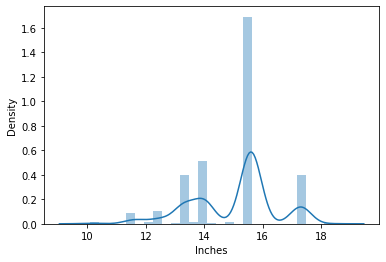

In [43]:
sns.distplot(x=train['Inches'])
plt.xlabel('Inches')
plt.show()

In [44]:
train['Weight (kg)'].value_counts()

2.20    102
2.10     42
2.40     38
2.00     36
2.30     34
       ... 
0.99      1
1.79      1
2.83      1
1.12      1
1.19      1
Name: Weight (kg), Length: 162, dtype: int64

In [45]:
test['Weight (kg)'].value_counts()

2.20    24
2.10    16
2.00     9
1.30     9
1.20     7
        ..
2.09     1
0.97     1
1.21     1
3.58     1
1.39     1
Name: Weight (kg), Length: 101, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


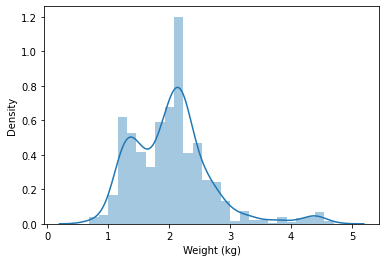

In [46]:
sns.distplot(x=train['Weight (kg)'])
plt.xlabel('Weight (kg)')
plt.show()

In [47]:
train['Price_euros'].value_counts()

1099.00    12
899.00     11
1499.00    10
1799.00     9
999.00      9
           ..
286.00      1
659.01      1
1031.00     1
1825.00     1
617.90      1
Name: Price_euros, Length: 670, dtype: int64

In [48]:
test['Price_euros'].value_counts()

1799.0    5
1499.0    4
1299.0    4
1199.0    4
499.0     3
         ..
1590.0    1
1513.0    1
805.0     1
333.0     1
999.0     1
Name: Price_euros, Length: 223, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


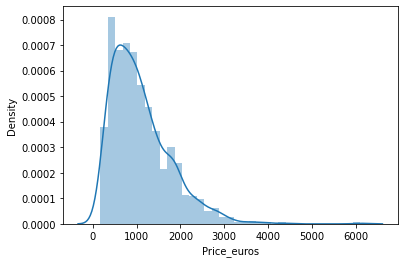

In [49]:
sns.distplot(x=train['Price_euros'])
plt.xlabel('Price_euros')
plt.show()

Now, we will look at the categorical variables.  
We will use the value_counts method to get more 
information about each variable.  For each categorical 
variable, we will also check that the set of values 
in the test set is a subset of or equal to the set 
of values in the training set.  This is to make sure 
that we are careful when we create dummy variables later on. 


In [50]:
train['Company'].value_counts()

Dell         239
Lenovo       234
HP           230
Asus         125
Acer          86
MSI           39
Toshiba       36
Apple         14
Samsung        9
Razer          6
Microsoft      5
Mediacom       5
Chuwi          3
Vero           3
Google         2
Xiaomi         2
Huawei         2
Fujitsu        1
LG             1
Name: Company, dtype: int64

In [51]:
test['Company'].value_counts()

Lenovo       63
Dell         58
HP           44
Asus         33
Acer         17
MSI          15
Toshiba      12
Apple         7
Mediacom      2
LG            2
Fujitsu       2
Xiaomi        2
Razer         1
Google        1
Microsoft     1
Vero          1
Name: Company, dtype: int64

Note that for the Company variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 19 unique values in the 
training set and 16 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [52]:
set(test['Company']) <= set(train['Company'])

True

In [53]:
train['Product'].value_counts()

XPS 13                                26
Inspiron 3567                         21
250 G6                                17
Vostro 3568                           17
Legion Y520-15IKBN                    16
                                      ..
Tecra X40-D-10H                        1
UX510UX-CN269T (i7-7500U/8GB/256GB     1
Ideapad 700-15ISK                      1
Rog GL702VM-GC017T                     1
Yoga 730                               1
Name: Product, Length: 523, dtype: int64

In [54]:
test['Product'].value_counts()

Inspiron 3567     8
Inspiron 5570     6
XPS 13            4
250 G6            4
ProBook 450       4
                 ..
Yoga 720-13IKB    1
ProBook 440       1
Alienware 15      1
Probook 470       1
Inspiron 7773     1
Name: Product, Length: 193, dtype: int64

Note that for the Product variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 523 unique values in the 
training set and 193 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [55]:
set(test['Product']) <= set(train['Product'])

False

This means that for the Product variable, there are values in the test set 
that are not in the training set.

In [56]:
train['TypeName'].value_counts()

Notebook              589
Ultrabook             157
Gaming                155
2 in 1 Convertible     97
Workstation            24
Netbook                20
Name: TypeName, dtype: int64

In [57]:
test['TypeName'].value_counts()

Notebook              138
Gaming                 50
Ultrabook              39
2 in 1 Convertible     24
Workstation             5
Netbook                 5
Name: TypeName, dtype: int64

In [58]:
set(test['TypeName']) == set(train['TypeName'])

True

For the TypeName variable, the set of values in the test set 
is equal to the set of values in the training set.

In [59]:
train['ScreenResolution'].value_counts()

Full HD 1920x1080                                411
1366x768                                         227
IPS Panel Full HD 1920x1080                      175
IPS Panel Full HD / Touchscreen 1920x1080         43
Full HD / Touchscreen 1920x1080                   40
1600x900                                          21
Touchscreen 1366x768                              13
Quad HD+ / Touchscreen 3200x1800                  11
IPS Panel 4K Ultra HD 3840x2160                    9
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
4K Ultra HD / Touchscreen 3840x2160                8
IPS Panel 1366x768                                 6
Touchscreen 2560x1440                              5
Touchscreen 2256x1504                              5
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Touchscreen 1920x1200                    4
IPS Panel Retina Display 2880x1800                 4
4K Ultra HD 3840x2160                              4
IPS Panel Retina Display 2560x1600            

In [60]:
test['ScreenResolution'].value_counts()

Full HD 1920x1080                                96
IPS Panel Full HD 1920x1080                      55
1366x768                                         54
IPS Panel Full HD / Touchscreen 1920x1080        10
Full HD / Touchscreen 1920x1080                   7
IPS Panel Quad HD+ / Touchscreen 3200x1800        4
Quad HD+ / Touchscreen 3200x1800                  4
Touchscreen 1366x768                              3
IPS Panel 4K Ultra HD 3840x2160                   3
4K Ultra HD 3840x2160                             3
IPS Panel 2560x1440                               2
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     2
1440x900                                          2
IPS Panel Retina Display 2304x1440                2
4K Ultra HD / Touchscreen 3840x2160               2
IPS Panel Retina Display 2560x1600                2
Touchscreen 2560x1440                             2
1600x900                                          2
Quad HD+ 3200x1800                                1
Touchscreen 

Note that for the ScreenResolution variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 40 unique values in the 
training set and 24 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [61]:
set(test['ScreenResolution']) <= set(train['ScreenResolution'])

True

In [62]:
train['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              154
Intel Core i7 7700HQ 2.8GHz             110
Intel Core i7 7500U 2.7GHz              105
Intel Core i7 8550U 1.8GHz               59
Intel Core i5 8250U 1.6GHz               58
                                       ... 
Intel Core i7 7700HQ 2.7GHz               1
Intel Celeron Dual Core 3855U 1.6GHz      1
Intel Atom X5-Z8350 1.44GHz               1
Intel Atom Z8350 1.92GHz                  1
Intel Core i5 6260U 1.8GHz                1
Name: Cpu, Length: 104, dtype: int64

In [63]:
test['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              36
Intel Core i7 7700HQ 2.8GHz             36
Intel Core i7 7500U 2.7GHz              29
Intel Core i5 8250U 1.6GHz              14
Intel Core i7 8550U 1.8GHz              14
Intel Core i5 6200U 2.3GHz              11
Intel Core i3 6006U 2GHz                11
Intel Core i7 6500U 2.5GHz              10
Intel Core i3 7100U 2.4GHz              10
Intel Core i7 6700HQ 2.6GHz             10
Intel Core i5 6300U 2.4GHz               4
Intel Core i3 7130U 2.7GHz               3
Intel Pentium Quad Core N4200 1.1GHz     3
Intel Celeron Dual Core N3060 1.6GHz     3
Intel Core i3 6006U 2.0GHz               3
Intel Core i7 6820HK 2.7GHz              3
Intel Core i5 6300HQ 2.3GHz              3
Intel Core i7 6600U 2.6GHz               3
Intel Core i7 7820HK 2.9GHz              3
AMD A9-Series 9420 3GHz                  3
Intel Core i7 7600U 2.8GHz               3
Intel Core i7 7660U 2.5GHz               2
Intel Celeron Dual Core N3350 1.1GHz     2
Intel Core 

Note that for the Cpu variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 104 unique values in the 
training set and 59 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [64]:
set(test['Cpu']) <= set(train['Cpu'])

False

This means that for the Cpu variable, there are values in the test set 
that are not in the training set.

In [65]:
train['Ram'].value_counts()

8GB     495
4GB     310
16GB    146
6GB      35
12GB     22
2GB      18
32GB     13
24GB      2
64GB      1
Name: Ram, dtype: int64

In [66]:
test['Ram'].value_counts()

8GB     124
4GB      65
16GB     54
6GB       6
2GB       4
32GB      4
12GB      3
24GB      1
Name: Ram, dtype: int64

Note that for the Ram variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 9 unique values in the 
training set and 8 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [67]:
set(test['Ram']) <= set(train['Ram'])

True

In [68]:
train['Memory'].value_counts()

256GB SSD                        339
1TB HDD                          187
500GB HDD                        106
512GB SSD                         84
128GB SSD +  1TB HDD              74
128GB SSD                         56
256GB SSD +  1TB HDD              50
32GB Flash Storage                34
2TB HDD                           15
64GB Flash Storage                14
512GB SSD +  1TB HDD              12
1TB SSD                           11
1.0TB Hybrid                       7
256GB Flash Storage                6
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           4
16GB SSD                           3
180GB SSD                          3
512GB SSD +  2TB HDD               3
128GB Flash Storage                3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
128GB HDD                          1
256GB SSD +  256GB SSD             1
512GB SSD +  256GB SSD             1
3

In [69]:
test['Memory'].value_counts()

256GB SSD                    73
1TB HDD                      36
512GB SSD                    34
500GB HDD                    26
256GB SSD +  1TB HDD         23
128GB SSD                    20
128GB SSD +  1TB HDD         20
32GB Flash Storage            4
256GB SSD +  2TB HDD          4
1TB SSD                       3
32GB SSD                      2
180GB SSD                     2
1.0TB Hybrid                  2
512GB SSD +  1TB HDD          2
256GB Flash Storage           2
128GB Flash Storage           1
512GB Flash Storage           1
2TB HDD                       1
512GB SSD +  1.0TB Hybrid     1
256GB SSD +  1.0TB Hybrid     1
256GB SSD +  256GB SSD        1
16GB Flash Storage            1
64GB Flash Storage            1
Name: Memory, dtype: int64

Note that for the Memory variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 37 unique values in the 
training set and 23 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [70]:
set(test['Memory']) <= set(train['Memory'])

False

This means that for the Memory variable, there are values in the test set 
that are not in the training set.

In [71]:
train['Gpu'].value_counts()

Intel HD Graphics 620      222
Intel HD Graphics 520      150
Intel UHD Graphics 620      58
Nvidia GeForce GTX 1050     55
Nvidia GeForce 940MX        37
                          ... 
AMD FirePro W6150M           1
Nvidia GeForce 960M          1
AMD R17M-M1-70               1
AMD Radeon R7 M465           1
Intel HD Graphics 540        1
Name: Gpu, Length: 103, dtype: int64

In [72]:
test['Gpu'].value_counts()

Intel HD Graphics 620           59
Intel HD Graphics 520           35
Nvidia GeForce GTX 1050         11
Nvidia GeForce GTX 1060         11
Intel UHD Graphics 620          10
AMD Radeon 530                   9
Nvidia GeForce GTX 1050 Ti       8
Nvidia GeForce GTX 1070          7
Intel HD Graphics 500            6
Nvidia GeForce 930MX             6
Nvidia GeForce 940MX             6
Nvidia GeForce GTX 980M          5
Intel HD Graphics 400            5
Nvidia GeForce MX150             4
Nvidia GeForce GTX 960M          4
AMD Radeon R5 M430               4
AMD Radeon R5                    4
Intel HD Graphics 515            3
Nvidia GeForce 920MX             3
Intel HD Graphics                3
Intel HD Graphics 510            3
Intel HD Graphics 6000           3
Nvidia GeForce 920MX             2
Intel Iris Plus Graphics 640     2
Intel HD Graphics 615            2
AMD Radeon 520                   2
Nvidia GeForce MX130             2
Nvidia Quadro M2200M             2
AMD Radeon RX 550   

Note that for the Gpu variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 103 unique values in the 
training set and 59 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [73]:
set(test['Gpu']) <= set(train['Gpu'])

False

This means that for the Gpu variable, there are values in the test set 
that are not in the training set.

In [74]:
train['OpSys'].value_counts()

Windows 10      852
Linux            56
No OS            53
Windows 7        35
Chrome OS        23
macOS             9
Windows 10 S      7
Mac OS X          5
Android           2
Name: OpSys, dtype: int64

In [75]:
test['OpSys'].value_counts()

Windows 10      220
No OS            13
Windows 7        10
Linux             6
Chrome OS         4
macOS             4
Mac OS X          3
Windows 10 S      1
Name: OpSys, dtype: int64

Note that for the OpSys variable, the set of values
in the training set and the set of values in the test set 
are not the same because there are 9 unique values in the 
training set and 8 unique values in the test set.  We will 
check that the set of values in the test set is a subset of 
the set of values in the training set.

In [76]:
set(test['OpSys']) <= set(train['OpSys'])

True

Now, we will look at a correlation matrix between the numeric variables.

<AxesSubplot:>

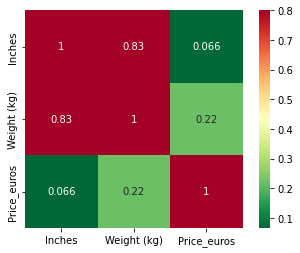

In [77]:
#correlation matrix
corrmat = train.corr()
#f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True,cmap="RdYlGn_r")

There is very little correlation between the target variable 
and the other numeric variables.

# Step 4: Outlier Detection

Here, we will only be working with the training set.  

First, we will look at a univariate box plot of the target variable. 

<AxesSubplot:xlabel='Price_euros'>

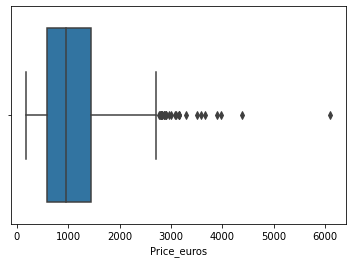

In [78]:
sns.boxplot(x=train['Price_euros'])

There seems to be a big outlier when Price_euros is about 6000.  
Let us look at the outlier in more detail.

In [79]:
train[(train['Price_euros'] > 6000)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


We will remove the outlier.

In [80]:
train.drop(train[(train['Price_euros'] > 6000)].index, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
train.shape

(1041, 12)

In [82]:
train.describe()

,Inches,Weight (kg),Price_euros
count,1041.000000,1041.000000,1041.000000
mean,15.014025,2.035417,1091.292911
std,1.417845,0.655662,660.366754
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,589.000000
50%,15.600000,2.040000,949.000000
75%,15.600000,2.300000,1449.000000
max,18.400000,4.700000,4389.000000


In [83]:
train[(train['Price_euros'] > 6000)]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (kg),Price_euros


Now, we will look at the remaining numeric variables.  
For univariate analysis, we will use box plots.  
For mulitvariate analysis, we will use scatter plots.

<AxesSubplot:xlabel='Inches'>

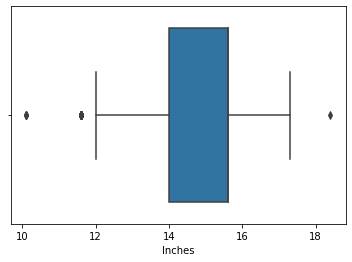

In [84]:
sns.boxplot(x=train['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

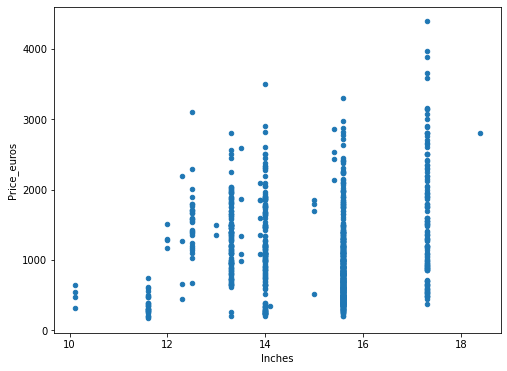

In [85]:
train.plot.scatter(x='Inches', y='Price_euros', figsize=(8,6))

<AxesSubplot:xlabel='Weight (kg)'>

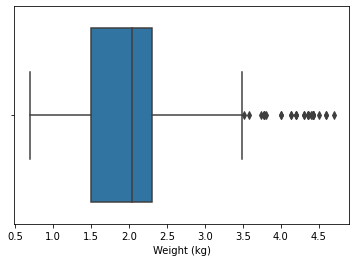

In [86]:
sns.boxplot(x=train['Weight (kg)'])

<AxesSubplot:xlabel='Weight (kg)', ylabel='Price_euros'>

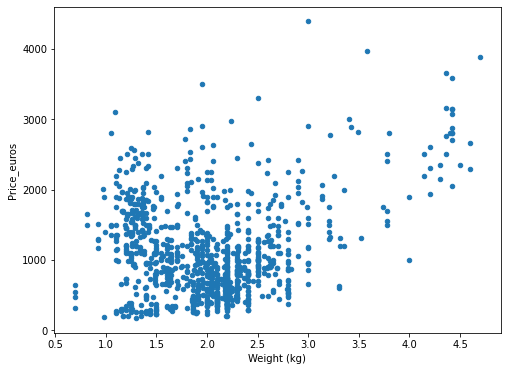

In [87]:
train.plot.scatter(x='Weight (kg)', y='Price_euros', figsize=(8,6))

For the categorical variables, we will use mulitvariate box plots.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

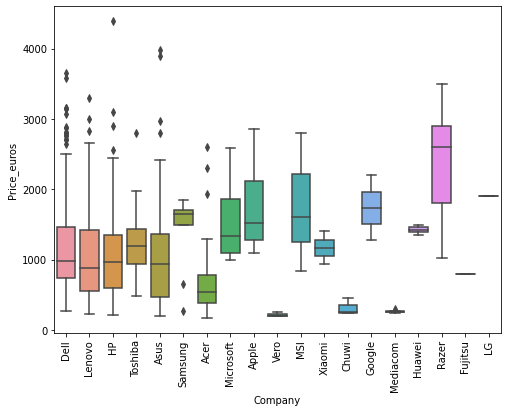

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

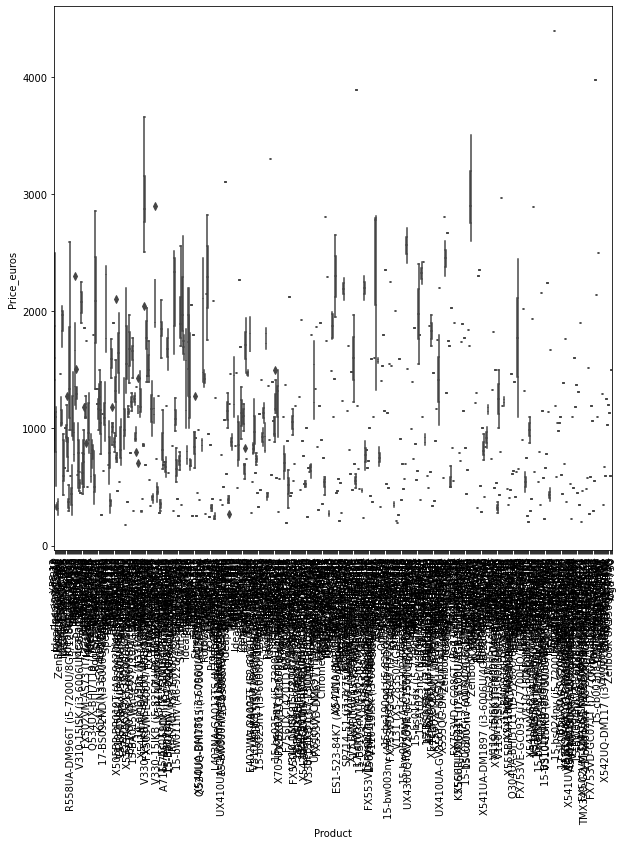

In [89]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='Product', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2 in 1 Convertible'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Ultrabook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, 'Netbook'),
  Text(5, 0, 'Workstation')])

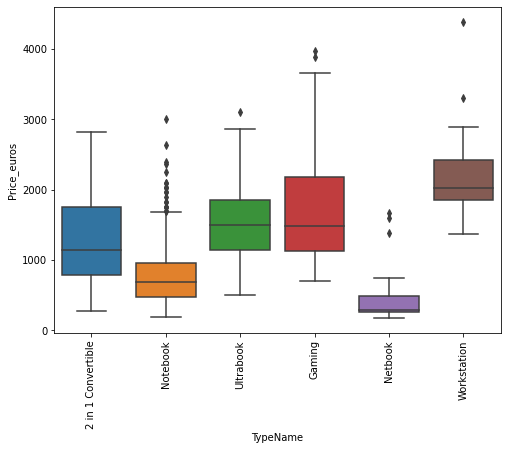

In [90]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TypeName', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

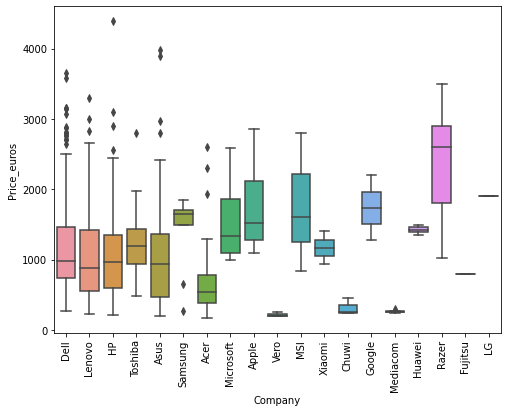

In [91]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

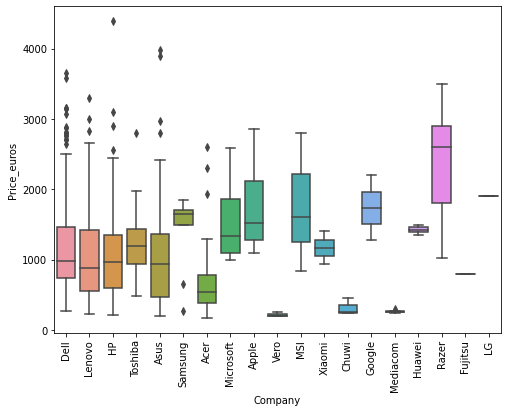

In [92]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

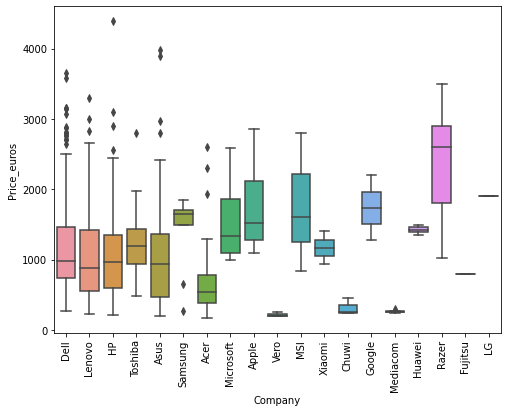

In [93]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

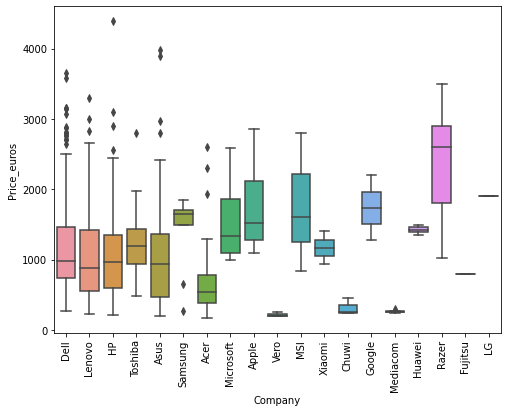

In [94]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

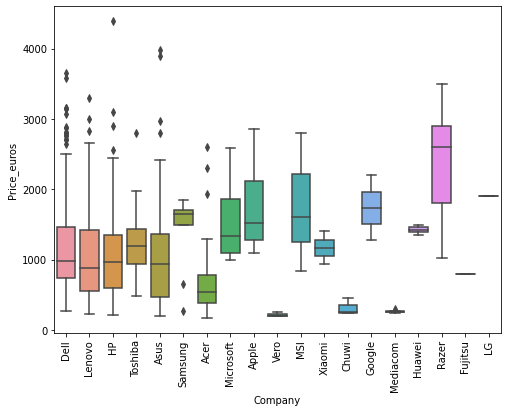

In [95]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Toshiba'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'Samsung'),
  Text(6, 0, 'Acer'),
  Text(7, 0, 'Microsoft'),
  Text(8, 0, 'Apple'),
  Text(9, 0, 'Vero'),
  Text(10, 0, 'MSI'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Chuwi'),
  Text(13, 0, 'Google'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Huawei'),
  Text(16, 0, 'Razer'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

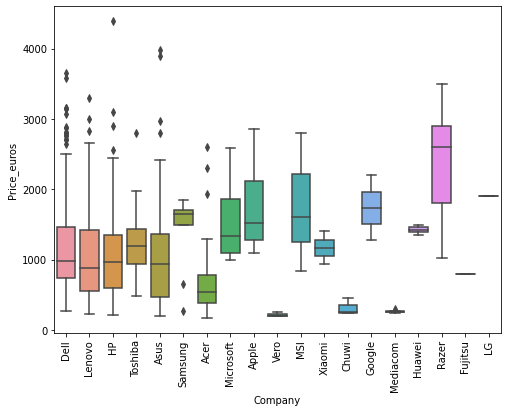

In [96]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Company', y='Price_euros', data=train)
plt.xticks(rotation=90)